In [1]:
# https://www.kaggle.com/code/namanmanchanda/rnn-in-pytorch

In [2]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = torch.linspace(0,799,800)

In [4]:
# def f(t):
#     return np.sin(2*np.pi*t / 30) * np.log(t) / 2 + t / 100

In [5]:
def f(t):
    return np.cos(2*np.pi*t / 30) * np.sin(2*np.pi*t / 120)

In [6]:
y = f(x)

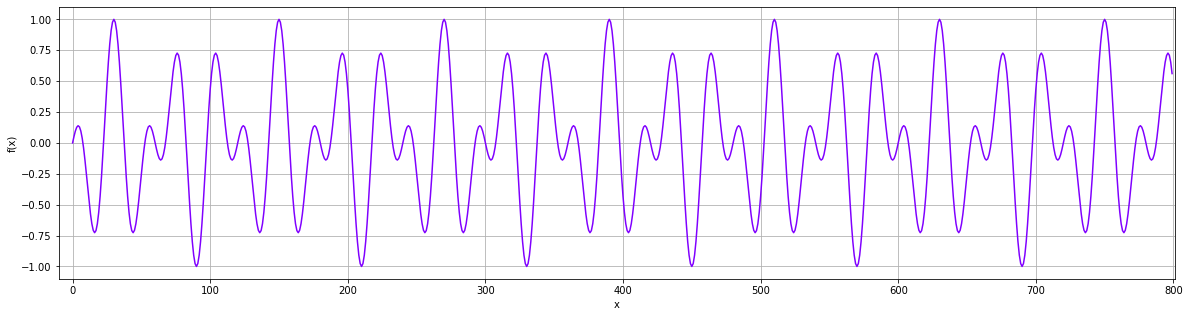

In [7]:
plt.figure(figsize=(20, 5))
plt.xlim(-10, 801)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(y.numpy(),color='#8000ff')
plt.show()

In [13]:
WINDOW_SIZE = 50

In [14]:
test_size = WINDOW_SIZE
train_set = y[:-test_size]
test_set = y[-test_size:]

##### 3.1.1 Plotting the training/testing set

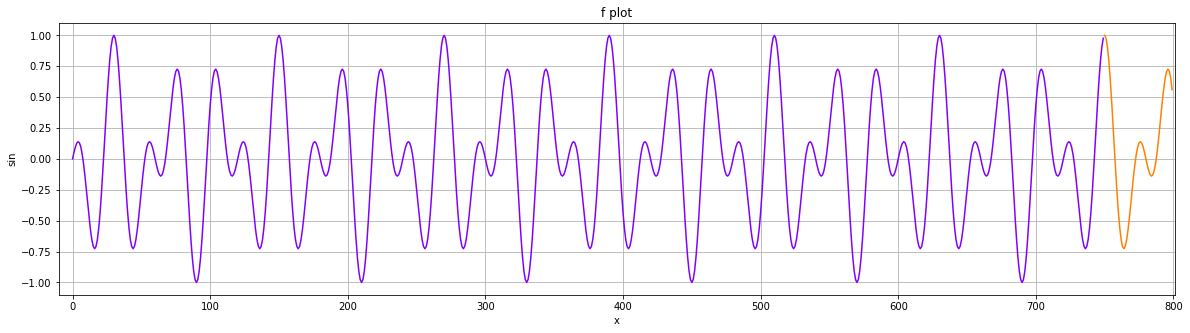

In [15]:
plt.figure(figsize=(20, 5))
plt.xlim(-10,801)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("sin")
plt.title("f plot")
plt.plot(train_set.numpy(),color='#8000ff')
plt.plot(range(800-WINDOW_SIZE,800),test_set.numpy(),color="#ff8000")
plt.show()

In [16]:
def input_data(seq, ws):
    out = []
    L = len(seq)
    
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window, label))
        
    return out

In [17]:
train_data = input_data(train_set, WINDOW_SIZE)
len(train_data)

700

# LSTM

In [18]:
class LSTM(nn.Module):
    
    def __init__(self,input_size = 1, hidden_size = 50, out_size = 1):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, out_size)
        self.hidden = (torch.zeros(1,1,hidden_size),torch.zeros(1,1,hidden_size))
    
    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]

#### 4.2 Model Instantiation <a id = 11></a>

In [19]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

##### 4.2.1 Printing the model

In [20]:
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

#### 4.3 Training <a id = 12></a>

During training, I'm visualising the prediction process for the test data on the go. It will give a better understanding of how the training is being carried out in each epoch. The training sequence is represented in <span style="color:#8000ff">purple</span> while the predicted sequence in represented in <span style="color:#ff8000">orange</span>.

In [21]:
y[-WINDOW_SIZE:].shape

torch.Size([50])

Epoch 0 Loss: 0.6637495756149292
Performance on test range: 0.20786361396312714


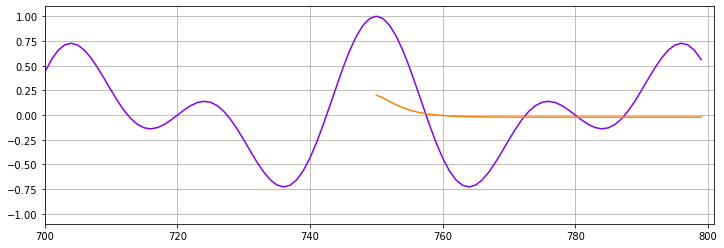

Epoch 1 Loss: 0.0417102612555027
Performance on test range: 0.1026897206902504


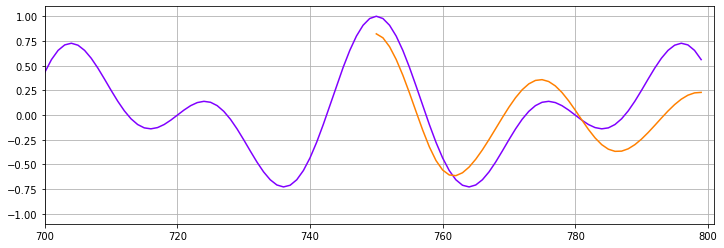

Epoch 2 Loss: 0.015247831121087074
Performance on test range: 0.1815142184495926


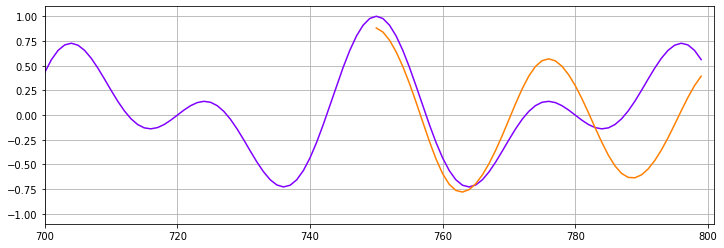

Epoch 3 Loss: 0.007757759187370539
Performance on test range: 0.2294677197933197


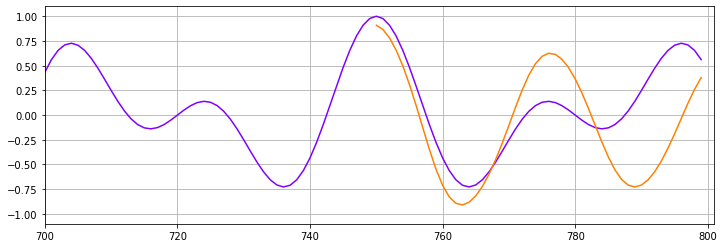

Epoch 4 Loss: 0.007357537746429443
Performance on test range: 0.3153550624847412


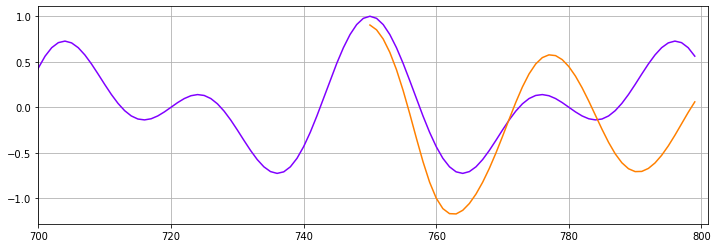

Epoch 5 Loss: 0.00356775033287704
Performance on test range: 0.028829829767346382


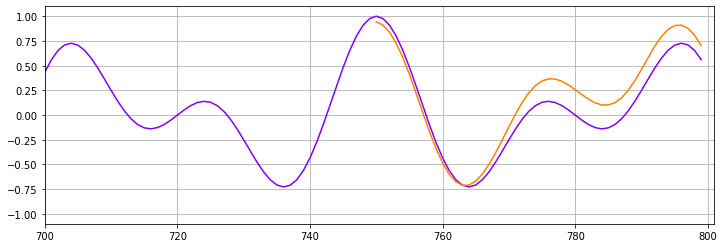

Epoch 6 Loss: 0.009089445695281029
Performance on test range: 0.04700294882059097


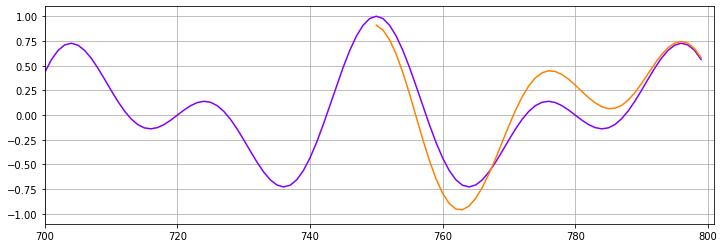

Epoch 7 Loss: 0.005460062529891729
Performance on test range: 0.043393783271312714


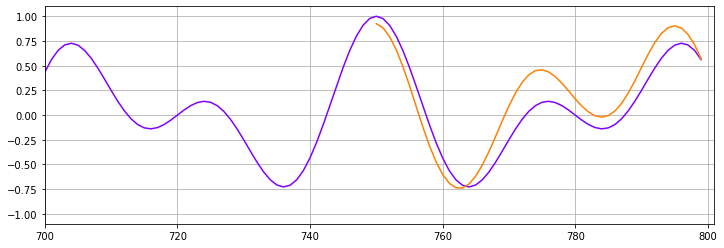

Epoch 8 Loss: 0.013291272334754467
Performance on test range: 0.08355245739221573


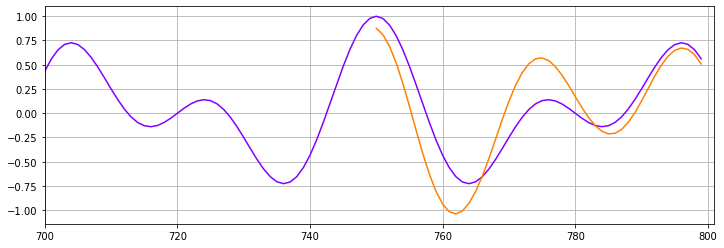

Epoch 9 Loss: 0.00038756377762183547
Performance on test range: 0.3273162543773651


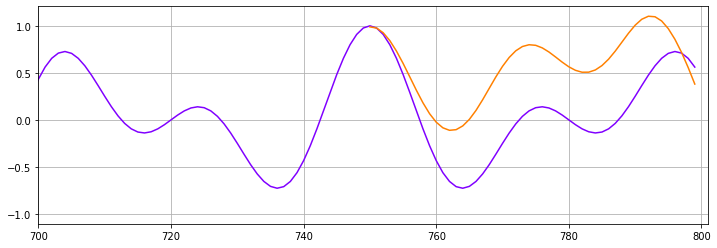

Epoch 10 Loss: 0.006573834456503391
Performance on test range: 0.07249779999256134


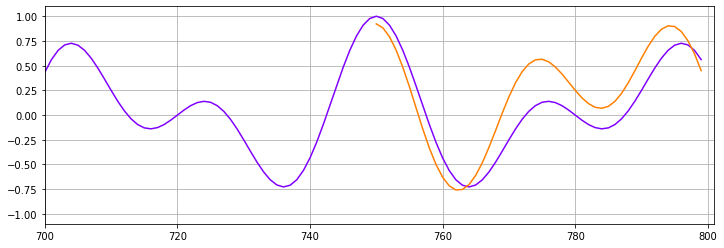

Epoch 11 Loss: 0.0020769794937223196
Performance on test range: 0.021286601200699806


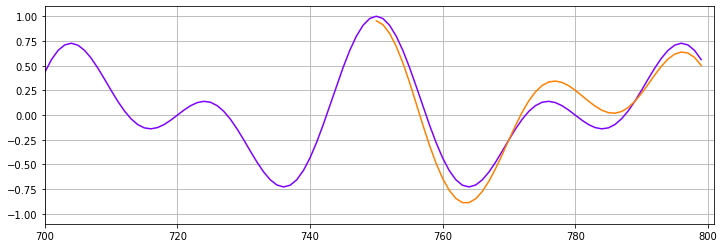

Epoch 12 Loss: 0.0004538609064184129
Performance on test range: 0.027335675433278084


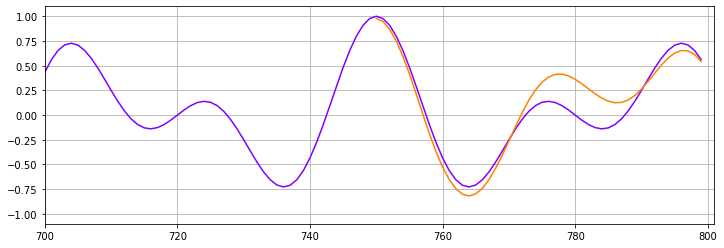

Epoch 13 Loss: 1.6030645610953798e-06
Performance on test range: 0.2725406587123871


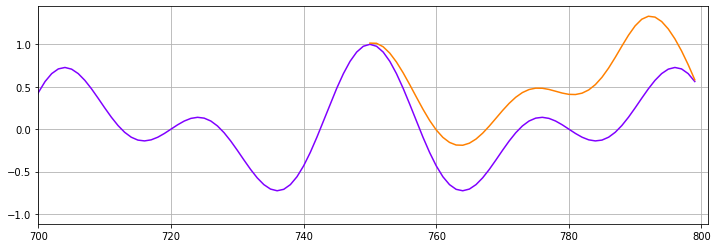

Epoch 14 Loss: 0.0011761649511754513
Performance on test range: 0.10718632489442825


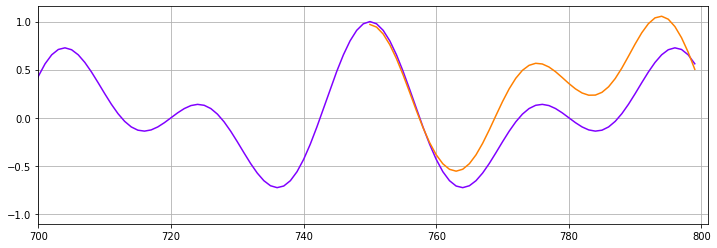

Epoch 15 Loss: 4.043057560920715e-05
Performance on test range: 0.3055260181427002


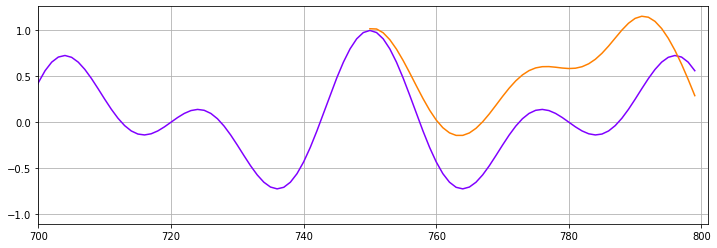

Epoch 16 Loss: 0.003947889897972345
Performance on test range: 0.023339858278632164


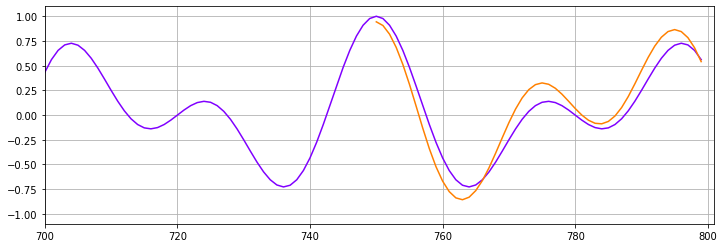

Epoch 17 Loss: 0.00017968830070458353
Performance on test range: 0.01347863208502531


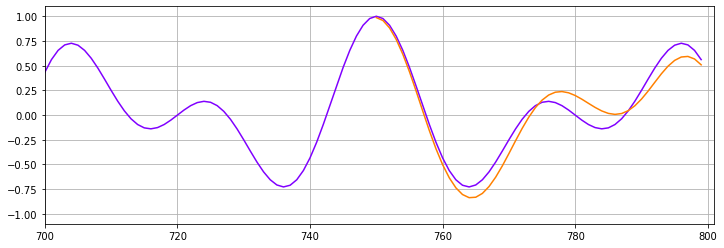

Epoch 18 Loss: 0.00024189017130993307
Performance on test range: 0.12634018063545227


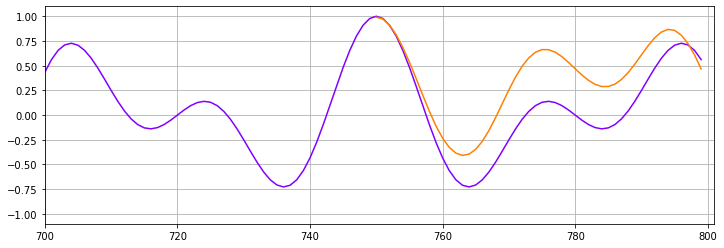

Epoch 19 Loss: 6.0705911892000586e-05
Performance on test range: 0.17410066723823547


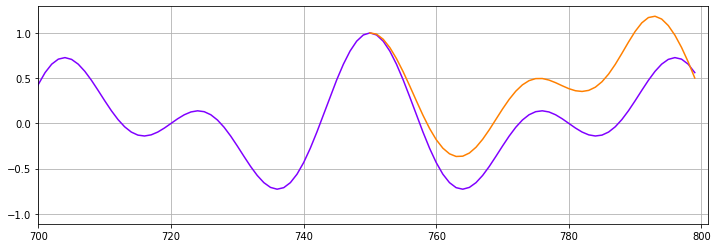

Epoch 20 Loss: 0.0003734079364221543
Performance on test range: 0.14298602938652039


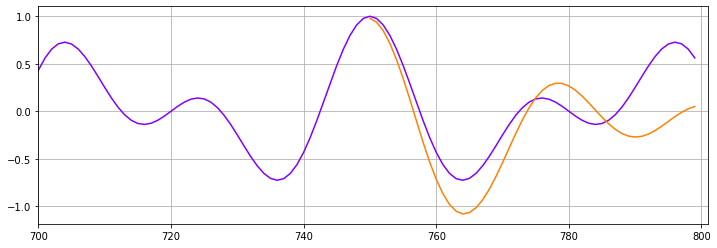

Epoch 21 Loss: 0.0035952383186668158
Performance on test range: 0.018698718398809433


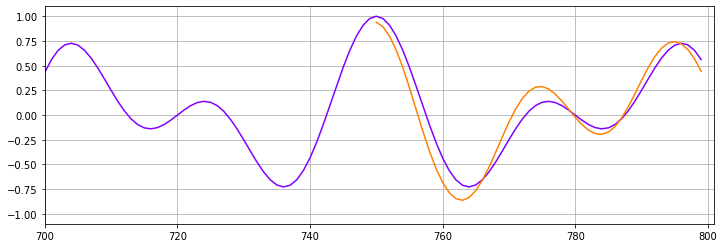

Epoch 22 Loss: 0.0008119624108076096
Performance on test range: 0.006202546879649162


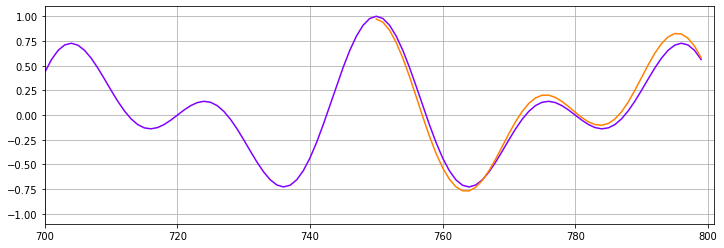

Epoch 23 Loss: 0.0006201623473316431
Performance on test range: 0.18110384047031403


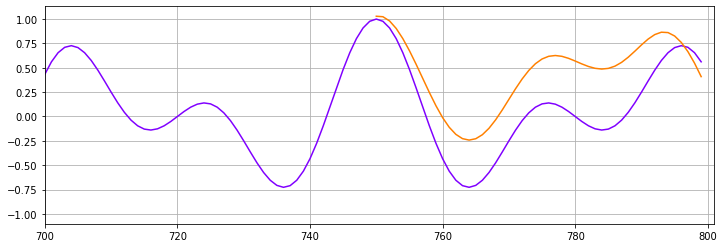

Epoch 24 Loss: 1.7718039089231752e-05
Performance on test range: 0.05363912135362625


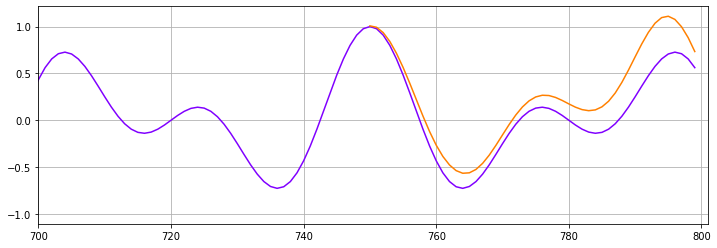

Epoch 25 Loss: 0.00023883515677880496
Performance on test range: 0.031514666974544525


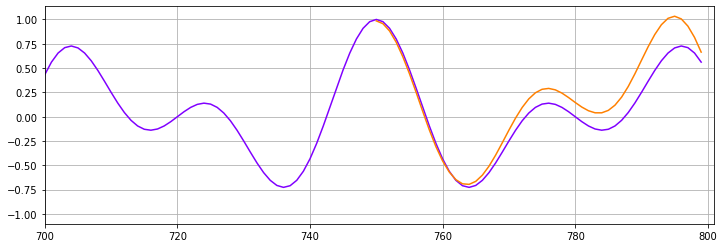

In [ ]:
epochs = 100
future = WINDOW_SIZE

for i in range(epochs):
    
    for seq, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                       torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    print(f"Epoch {i} Loss: {loss.item()}")
    
    preds = train_set[-WINDOW_SIZE:].tolist()
    for f in range(future):
        seq = torch.FloatTensor(preds[-WINDOW_SIZE:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size),
                           torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())
        
    loss = criterion(torch.tensor(preds[-WINDOW_SIZE:]), y[-WINDOW_SIZE:])
    print(f"Performance on test range: {loss}")
    
    plt.figure(figsize=(12,4))
    plt.xlim(700,801)
    plt.grid(True)
    plt.plot(y.numpy(),color='#8000ff')
    plt.plot(range(800-WINDOW_SIZE,800),preds[WINDOW_SIZE:],color='#ff8000')
    plt.show()